Pymaceuticals Inc.
----------------------------
Analysist 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [46]:
# Checking the number of mice.
unique_mice = merge_df['Mouse ID'].nunique()
unique_mice

249

In [47]:
#Check for any mouse ID with duplicate time points:
duplicates = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Display the data associated with that mouse ID:

duplicates 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merge_df.loc[merge_df["Mouse ID"]!="g989"]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [50]:
unique_mice_clean = cleaned_df['Mouse ID'].nunique()
print(f'Number of unique mice after cleaning: {unique_mice_clean}')

Number of unique mice after cleaning: 248



Generate Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Create Bar Charts and Pie Charts

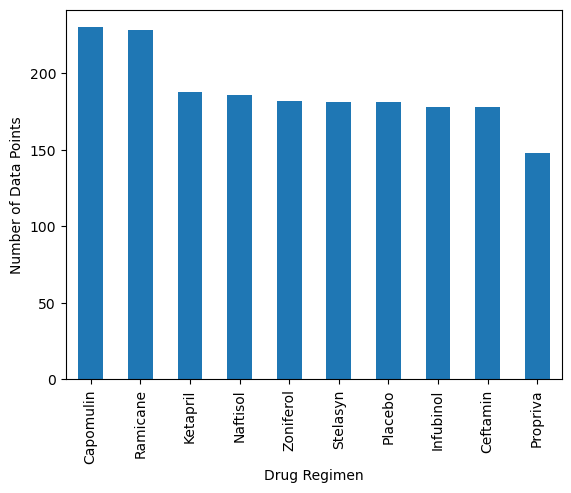

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = cleaned_df['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()



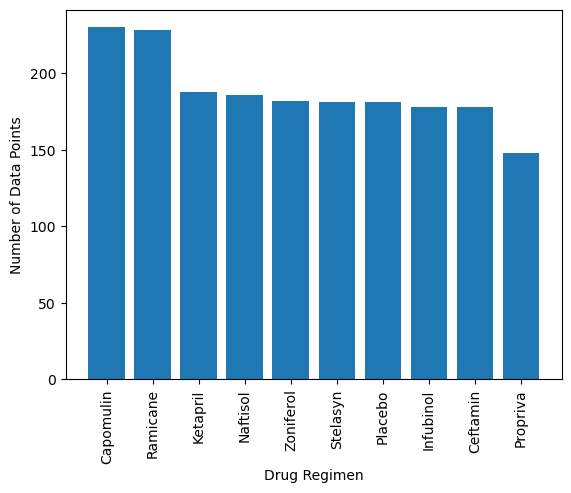

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(counts.index.values, counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.show()



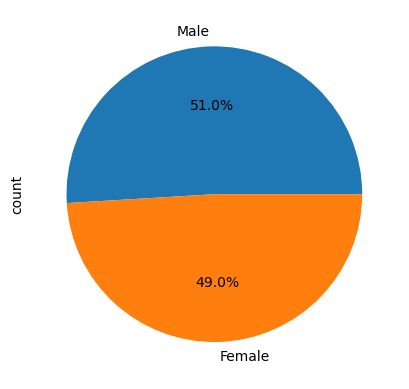

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_df['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()


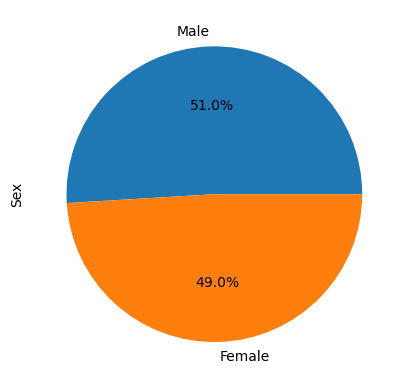

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_counts.values, labels=sex_counts.index.values, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_tumor =cleaned_df .groupby(['Mouse ID'])["Timepoint"].max()

Last_tumor_size=('Tumor Volume (mm3)', lambda x: x.iloc[-1])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_tumor,cleaned_df, on=["Mouse ID","Timepoint"])


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    final_tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_volume)

for i in range(len(treatments)):
    quartiles = tumor_vol_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_data[i].loc[(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]

print(f"{treatments[i]}'s potential outliers: {outliers}")



Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


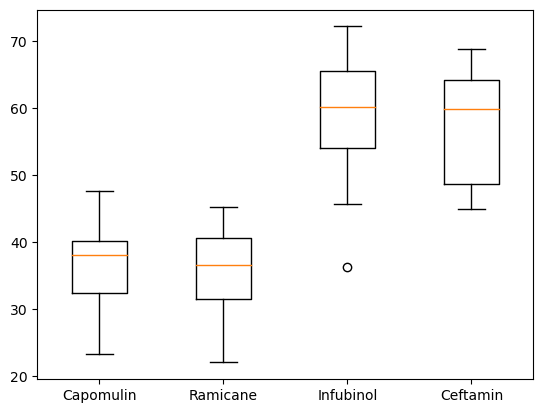

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments)
plt.show()



Line and Scatter Plots

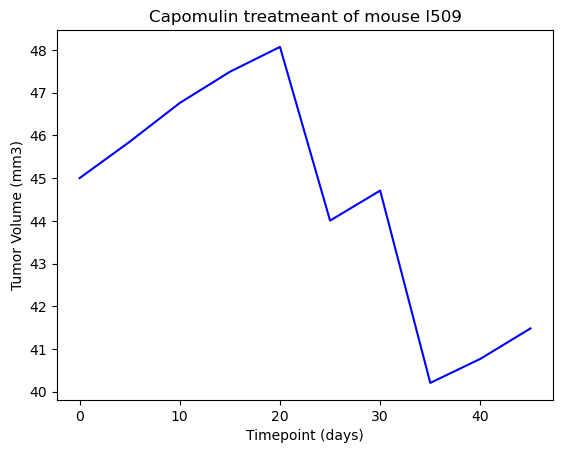

In [78]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
mouse_l509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
tumor_vol = mouse_l509['Tumor Volume (mm3)']
timepoint = mouse_l509['Timepoint']

fig1,ax1, = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Timepoint (days)")
ax1.plot(timepoint,tumor_vol,color="blue")
plt.show()

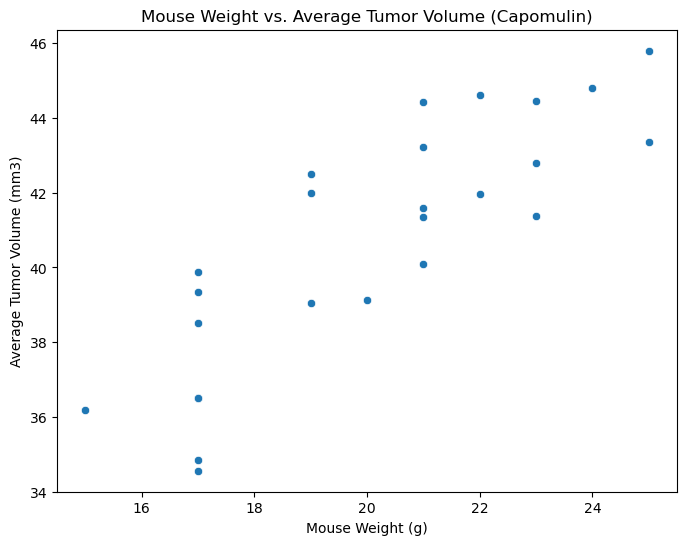

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import seaborn as sns
from scipy.stats import linregress
capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
scatter_data = pd.DataFrame({"Mouse Weight": mouse_weight, "Average Tumor Volume": avg_tumor_volume})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=scatter_data, x="Mouse Weight", y="Average Tumor Volume")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()




Correlation and Regression

The Correlation Coefficient between mouse weight and average Tumor Volume is 0.8419363424694722


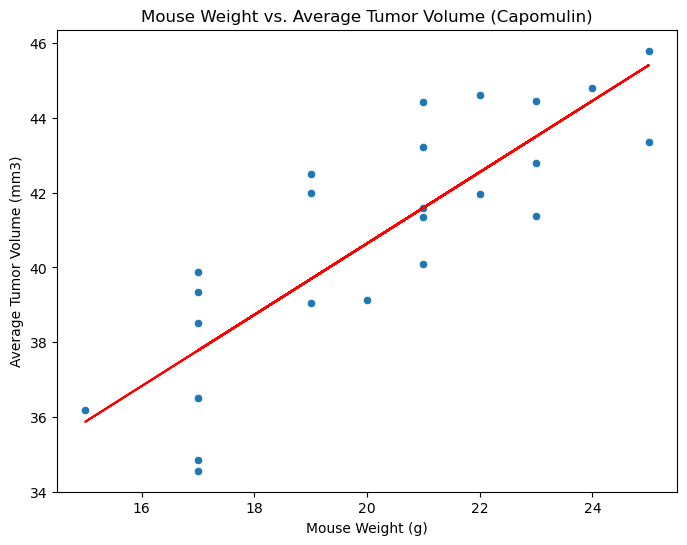

In [90]:
# Calculate the correlation coefficient and a linear regression model 
correlation = scatter_data["Mouse Weight"].corr(scatter_data["Average Tumor Volume"])
print("The Correlation Coefficient between mouse weight and average Tumor Volume is", correlation)
slope, intercept, rvalue, pvalue, stderr = linregress(scatter_data["Mouse Weight"], scatter_data["Average Tumor Volume"])

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.figure(figsize=(8, 6))
sns.scatterplot(data=scatter_data, x="Mouse Weight", y="Average Tumor Volume")
plt.plot(scatter_data["Mouse Weight"], slope * scatter_data["Mouse Weight"] + intercept, color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


In [92]:
# Print the regression equation
print("Regression Equation: Average Tumor Volume =", slope, "* Mouse Weight +", intercept)

Regression Equation: Average Tumor Volume = 0.9544396890241049 * Mouse Weight + 21.552160532685008
